# Fatemeh Vahabi

# HW1

###  first import the libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Pre-Processing

### we get the dataset at following cell.

In [2]:
data= pd.read_csv(r'C:\Users\BiG\Jupyter Lab\Bootcamp\archive (1)\top_insta_influencers_data.csv')
data.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country,successful
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain,False
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States,False
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN,False
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States,True
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States,True


### I need to know some information about the dataset.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
 10  successful         200 non-null    bool  
dtypes: bool(1), int64(2), object(8)
memory usage: 15.9+ KB


### I had some empty cell which I filled them.

In [49]:
data[data['60_day_eng_rate'].isnull()==True]['60_day_eng_rate'] = min(data['60_day_eng_rate'])
data['60_day_eng_rate'][167]=min(data['60_day_eng_rate'])

C:\Users\BiG\AppData\Local\Temp\ipykernel_12712\1226889624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data['60_day_eng_rate'].isnull()==True]['60_day_eng_rate'] = min(data['60_day_eng_rate'])
C:\Users\BiG\AppData\Local\Temp\ipykernel_12712\1226889624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['60_day_eng_rate'][167]=min(data['60_day_eng_rate'])


### we had some empty cells that I fix them with replacing the mode data with empty cells.

In [6]:

# Fill null values with mode
mode = data['country'].mode()[0]
data['country'].fillna(mode, inplace=True)
data.country.isnull().sum()

0

In [10]:
import pandas as pd

### We just mapped some string data into numerical .

# Map True/False to 1/0
data['successful'] = data['successful'].map({True: 1, False: 0})
data

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country,successful
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain,0
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States,0
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,United States,0
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States,1
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States,1
...,...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b,United States,1
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b,France,1
197,198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m,Brazil,0
198,199,nickjonas,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b,United States,1


In [15]:
data.country.unique()

array(['Spain', 'United States', 'Canada', 'Brazil', 'Netherlands',
       'United Kingdom', 'India', 'Uruguay', 'Turkey', 'Indonesia',
       'Colombia', 'France', 'Australia', 'Italy', 'United Arab Emirates',
       'Puerto Rico', "CÃ´te d'Ivoire", 'Anguilla', 'Switzerland',
       'Sweden', 'British Virgin Islands', 'Czech Republic', 'Mexico',
       'Germany', 'Russia'], dtype=object)

### I want to turn country feature into numerical form. so I used one hot vector method.

In [16]:


# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(data['country'])

# Concatenate the one-hot encoded columns to the original dataset
data = pd.concat([data, one_hot_encoded], axis=1)

# Drop the original country column
data.drop('country', axis=1, inplace=True)

In [17]:
data

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,successful,...,Puerto Rico,Russia,Spain,Sweden,Switzerland,Turkey,United Arab Emirates,United Kingdom,United States,Uruguay
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,0,...,0,0,1,0,0,0,0,0,0,0
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,0,...,0,0,0,0,0,0,0,0,1,0
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,0,...,0,0,0,0,0,0,0,0,1,0
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,1,...,0,0,0,0,0,0,0,0,1,0
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b,1,...,0,0,0,0,0,0,0,0,1,0
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b,1,...,0,0,0,0,0,0,0,0,0,0
197,198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m,0,...,0,0,0,0,0,0,0,0,0,0
198,199,nickjonas,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b,1,...,0,0,0,0,0,0,0,0,1,0


### I did the same as previouse cell . 

In [20]:
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the channel info column
data['channel_id'] = label_encoder.fit_transform(data['channel_info'])
data.drop('channel_info', axis=1, inplace=True)
data

,rank,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,successful,Anguilla,...,Russia,Spain,Sweden,Switzerland,Turkey,United Arab Emirates,United Kingdom,United States,Uruguay,channel_id
0,1,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,0,0,...,0,1,0,0,0,0,0,0,0,38
1,2,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,0,0,...,0,0,0,0,0,0,0,1,0,98
2,3,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,0,0,...,0,0,0,0,0,0,0,1,0,104
3,4,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,1,0,...,0,0,0,0,0,0,0,1,0,161
4,5,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,1,0,...,0,0,0,0,0,0,0,1,0,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b,1,0,...,0,0,0,0,0,0,0,1,0,66
196,197,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b,1,0,...,0,0,0,0,0,0,0,0,0,125
197,198,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m,0,0,...,0,0,0,0,0,0,0,0,0,108
198,199,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b,1,0,...,0,0,0,0,0,0,0,1,0,136


### There were some other object type columns which needed to be changed to numerical.

In [22]:
post=list(data['posts'])
post1=list()
for num in post:
    if 'k' in num:
        new_num=1000*float(num.replace('k',''))
        post1.append(new_num)
    else:
        post1.append(float(num))
data['posts']=post1

followers=list(data['followers'])
followers1=list()
for num in followers:
    if 'm' in num:
        new_num=1000000*float(num.replace('m',''))
        followers1.append(new_num)
    else:
        followers1.append(float(num))
data['followers']=followers1

avg_likes=list(data['avg_likes'])
avg_likes1=list()
for num in avg_likes:
    if 'm' in num:
        new_num=1000000*float(num.replace('m',''))
        avg_likes1.append(new_num)
    else:
        new_num=1000*float(num.replace('k',''))
        avg_likes1.append(new_num)
data['avg_likes']=avg_likes1

new_post_avg_like=list(data['new_post_avg_like'])  
new_post_avg_like1=list()
for num in new_post_avg_like:
    if 'm' in num:
        new_num=1000000*float(num.replace('m',''))
        new_post_avg_like1.append(new_num)    
    else:
        new_num=1000*float(num.replace('k',''))
        new_post_avg_like1.append(new_num)
data['new_post_avg_like']=new_post_avg_like1

total_likes=list(data['total_likes']) 
total_likes1=list()
for num in total_likes:
    if 'b' in num:
        new_num=1000000000*float(num.replace('b',''))
        total_likes1.append(new_num)
    else:
        new_num=1000000*float(num.replace('m',''))
        total_likes1.append(new_num)
data['total_likes']=total_likes1

day_eng_rate=list(data['60_day_eng_rate'])
day_eng_rate1=list()
for num in day_eng_rate:
    if '%' in num:
        new_num=float(num.replace('%',''))
        day_eng_rate1.append(new_num)
    else:
        new_num=float(num)
        day_eng_rate1.append(new_num)
data['60_day_eng_rate']=day_eng_rate1

In [23]:
data

,rank,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,successful,Anguilla,...,Russia,Spain,Sweden,Switzerland,Turkey,United Arab Emirates,United Kingdom,United States,Uruguay,channel_id
0,1,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10,0,0,...,0,1,0,0,0,0,0,0,0,38
1,2,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10,0,0,...,0,0,0,0,0,0,0,1,0,98
2,3,90,890.0,357300000.0,6800000.0,1.24,4400000.0,6.000000e+09,0,0,...,0,0,0,0,0,0,0,1,0,104
3,4,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10,1,0,...,0,0,0,0,0,0,0,1,0,161
4,5,91,6800.0,334100000.0,1900000.0,0.20,665300.0,1.250000e+10,1,0,...,0,0,0,0,0,0,0,1,0,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,71,2300.0,33200000.0,623800.0,1.40,464700.0,1.400000e+09,1,0,...,0,0,0,0,0,0,0,1,0,66
196,197,81,3800.0,33200000.0,390400.0,0.64,208000.0,1.500000e+09,1,0,...,0,0,0,0,0,0,0,0,0,125
197,198,79,770.0,33200000.0,193300.0,0.26,82600.0,1.492000e+08,0,0,...,0,0,0,0,0,0,0,0,0,108
198,199,78,2300.0,33000000.0,719600.0,1.42,467700.0,1.700000e+09,1,0,...,0,0,0,0,0,0,0,1,0,136


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rank                    200 non-null    int64  
 1   influence_score         200 non-null    int64  
 2   posts                   200 non-null    float64
 3   followers               200 non-null    float64
 4   avg_likes               200 non-null    float64
 5   60_day_eng_rate         199 non-null    float64
 6   new_post_avg_like       200 non-null    float64
 7   total_likes             200 non-null    float64
 8   successful              200 non-null    int64  
 9   Anguilla                200 non-null    uint8  
 10  Australia               200 non-null    uint8  
 11  Brazil                  200 non-null    uint8  
 12  British Virgin Islands  200 non-null    uint8  
 13  Canada                  200 non-null    uint8  
 14  Colombia                200 non-null    ui

# Visualization

### This code is used to read a CSV file and display a Heatmap using the Pandas and Seaborn libraries. The data2 variable is used to read the CSV file from the specified path, and the plt.figure and sns.heatmap functions are used to create and display the Heatmap with annotated correlation values, using the "rainbow" color map.

### We loaded the dataset againt inprder to show hitmap before and after preprocessing

C:\Users\BiG\AppData\Local\Temp\ipykernel_12712\211017591.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data2.corr(), annot = True, cmap = "rainbow");


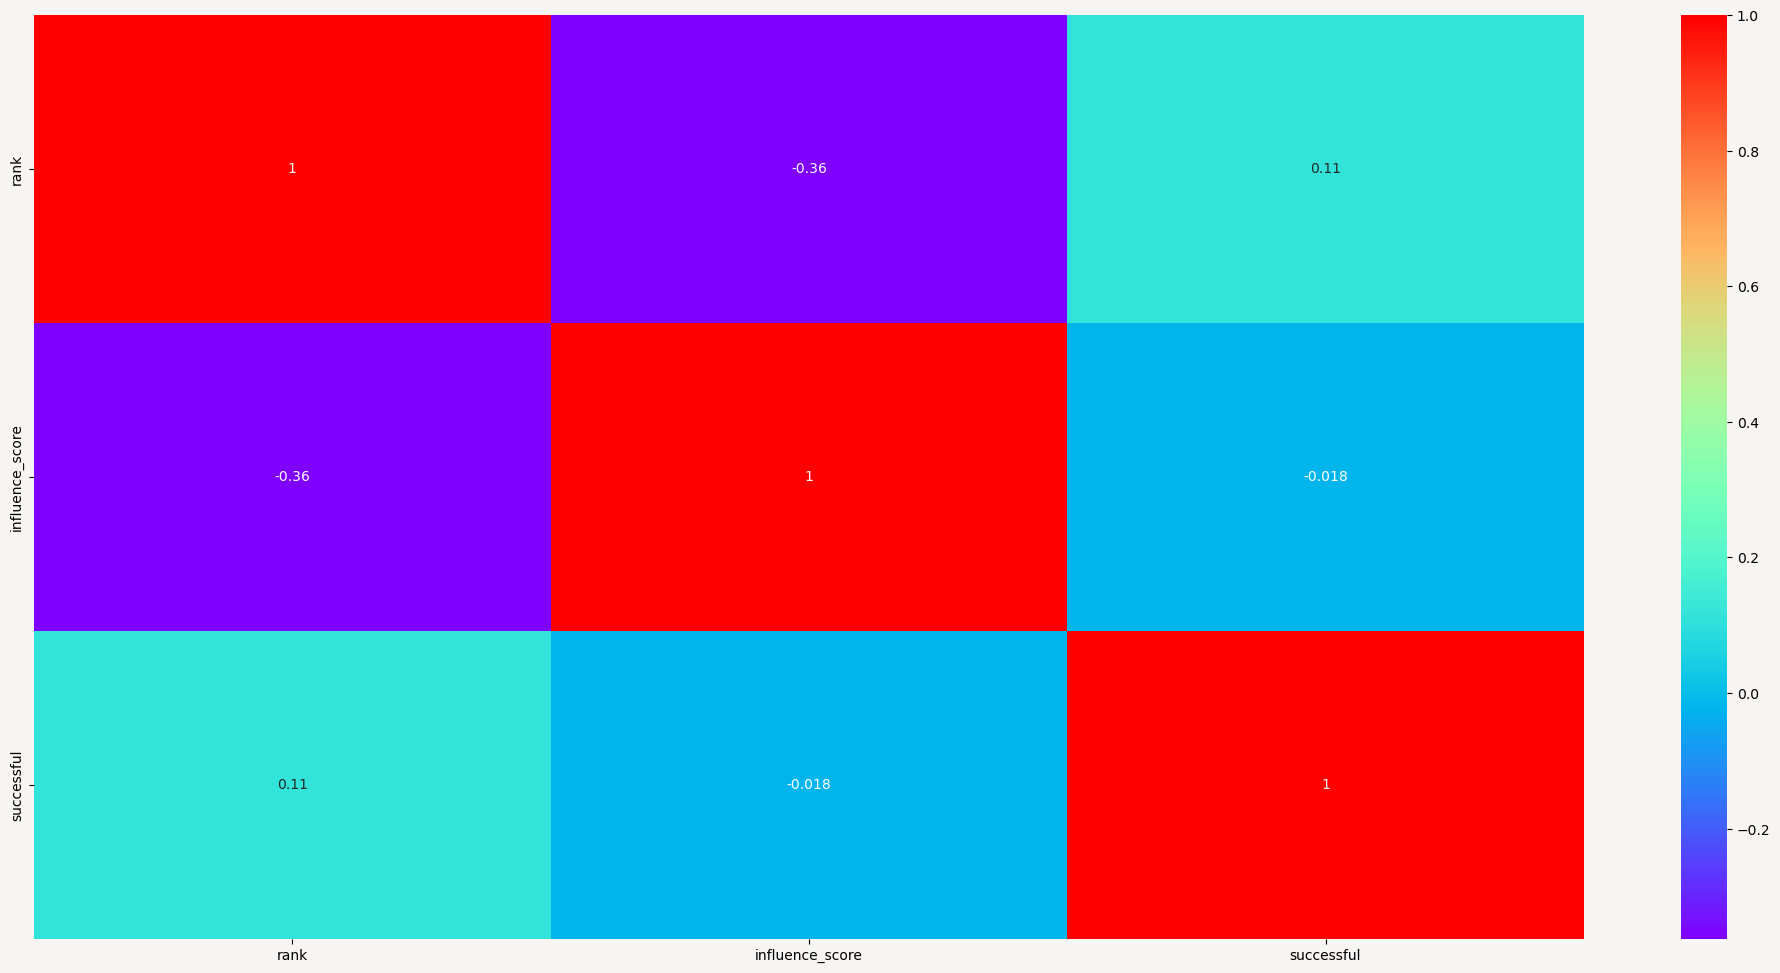

In [32]:
data2 = pd.read_csv(r'C:\Users\BiG\Jupyter Lab\Bootcamp\archive (1)\top_insta_influencers_data.csv')
plt.figure(figsize = (25, 12), facecolor = "#F7F4F4")
sns.heatmap(data2.corr(), annot = True, cmap = "rainbow");

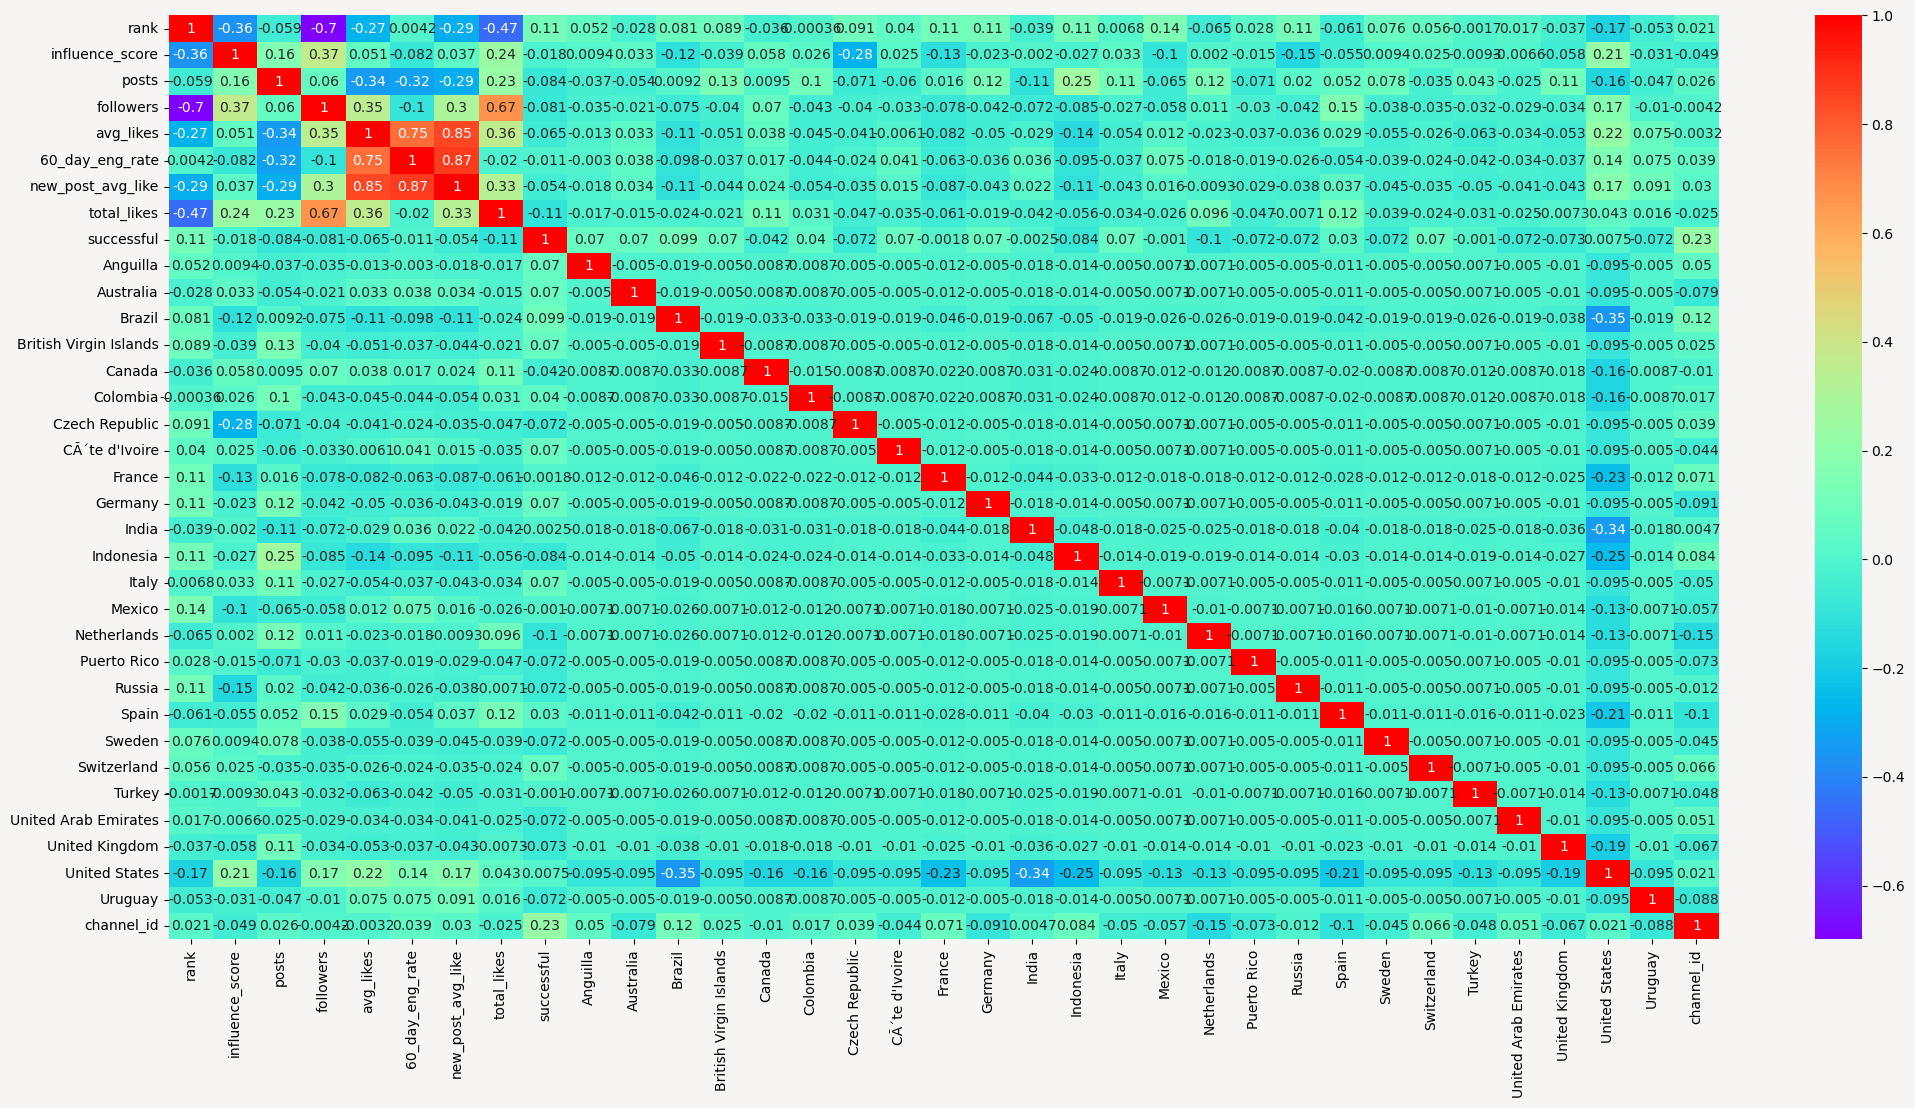

In [29]:
plt.figure(figsize = (25, 12), facecolor = "#F7F4F4")
sns.heatmap(data.corr(), annot = True, cmap = "rainbow")

### The code I provided is using the Python library matplotlib along with the seaborn library to create a countplot. The countplot is a type of bar plot that shows the counts of observations in each category of a categorical variable.

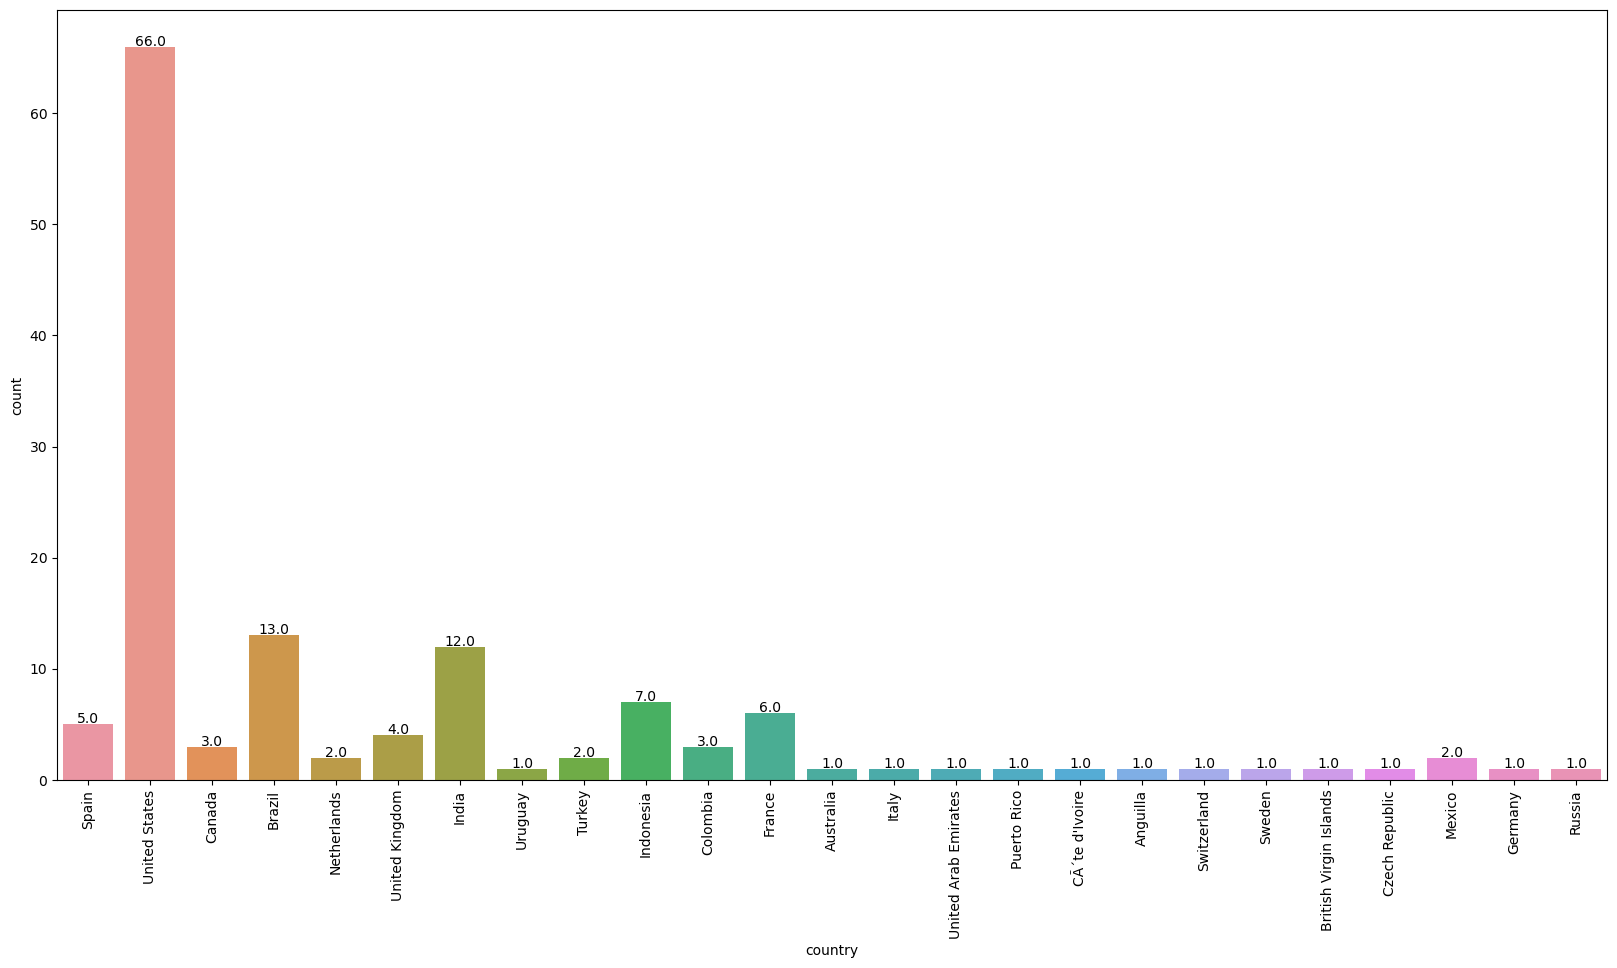

In [34]:
fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1,x = 'country' , data = data2)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

### The code I provided is using the Python library matplotlib along with the seaborn library to create a countplot. The countplot is a type of bar plot that shows the counts of observations in each category of a categorical variable.

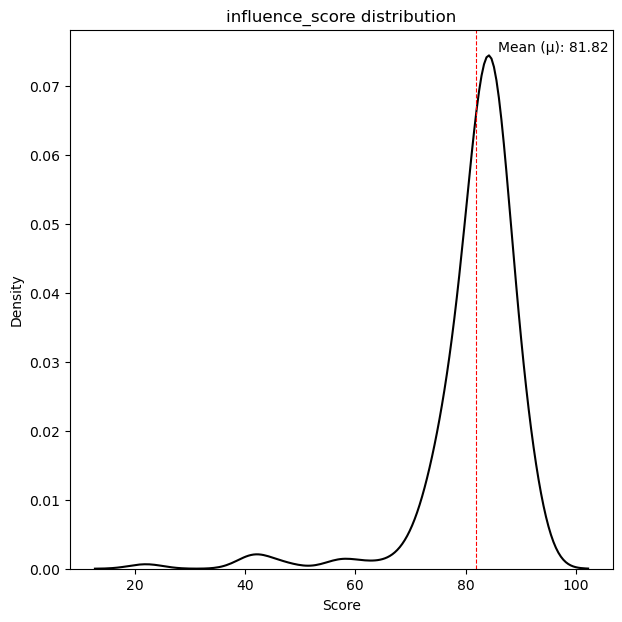

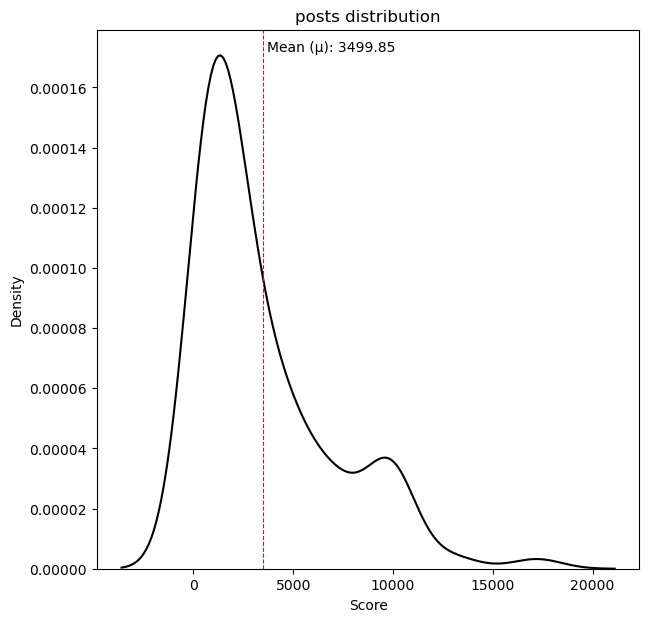

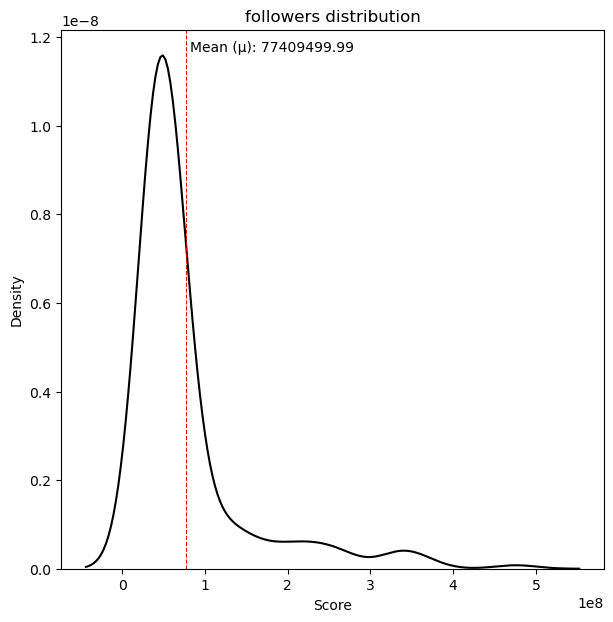

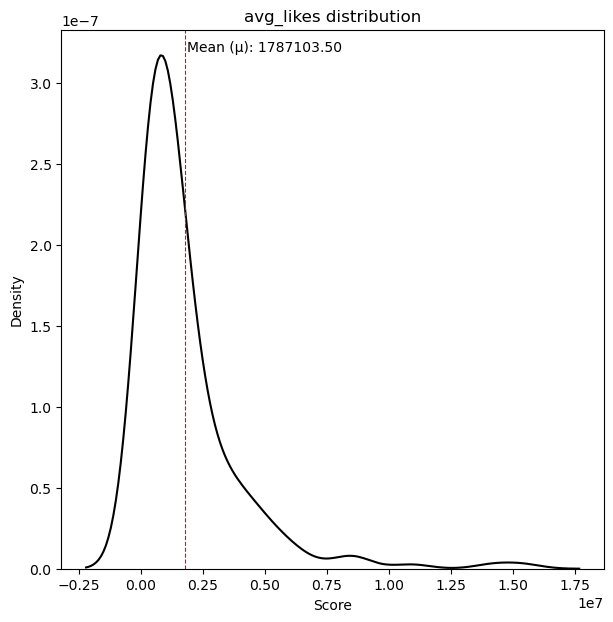

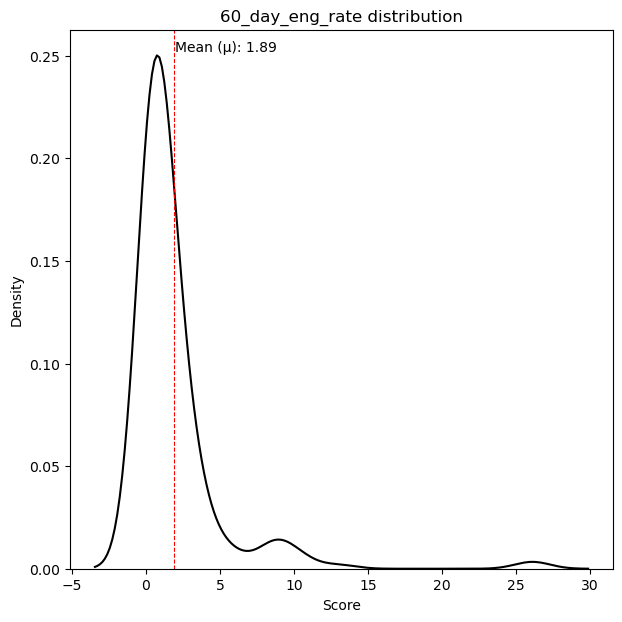

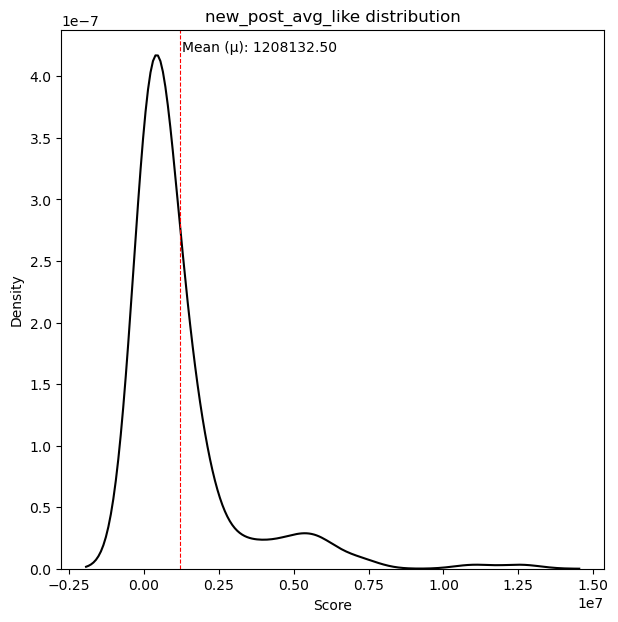

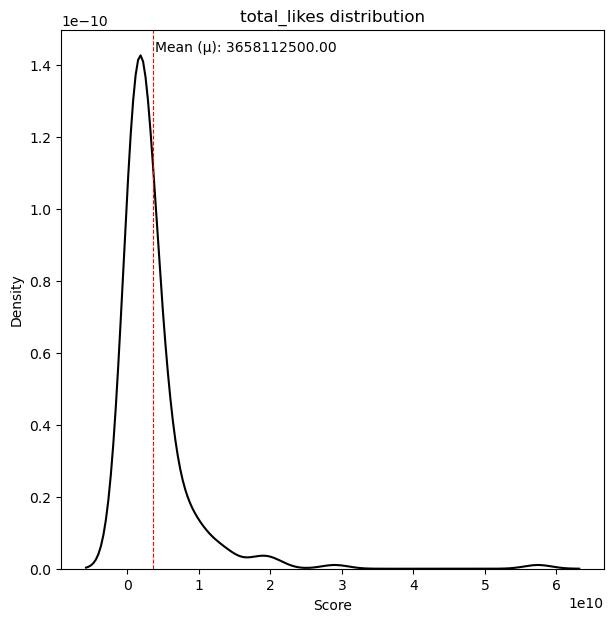

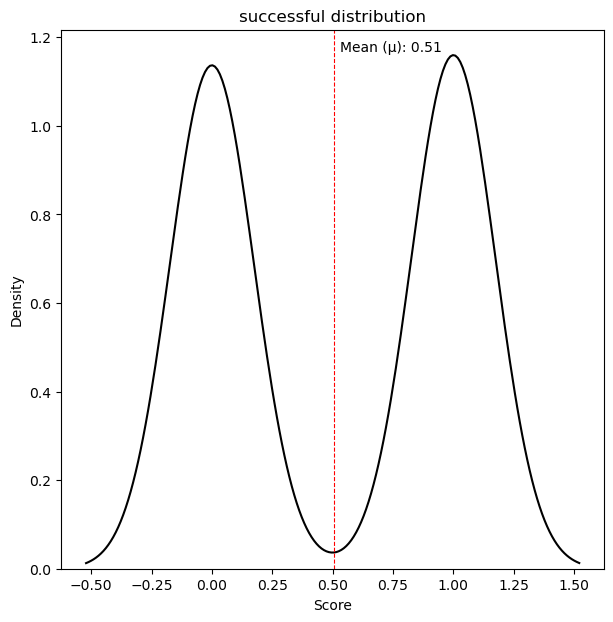

In [68]:
num_features = ['influence_score', 'posts', 'followers', 'avg_likes',
       '60_day_eng_rate', 'new_post_avg_like', 'total_likes', 'successful',
      ]
for column_name in num_features:
    plt.figure(figsize=(7, 7))
    plt.title("{column_name} distribution".format(column_name = column_name))
    #sns.histplot(train[column_name], stat='density', color='#E6E6FA')
    sns.kdeplot(data[column_name], color='black')
    plt.axvline(data[column_name].mean(), color='red', linestyle='--', linewidth=0.8)
    min_ylim, max_ylim = plt.ylim()
    plt.text(data[column_name].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(data[column_name].mean()))
    plt.xlabel("Score")
    plt.ylabel("Density")
    plt.show()

### The code I provided is using the Python library seaborn to create a pair plot for a subset of numerical features in my dataset.

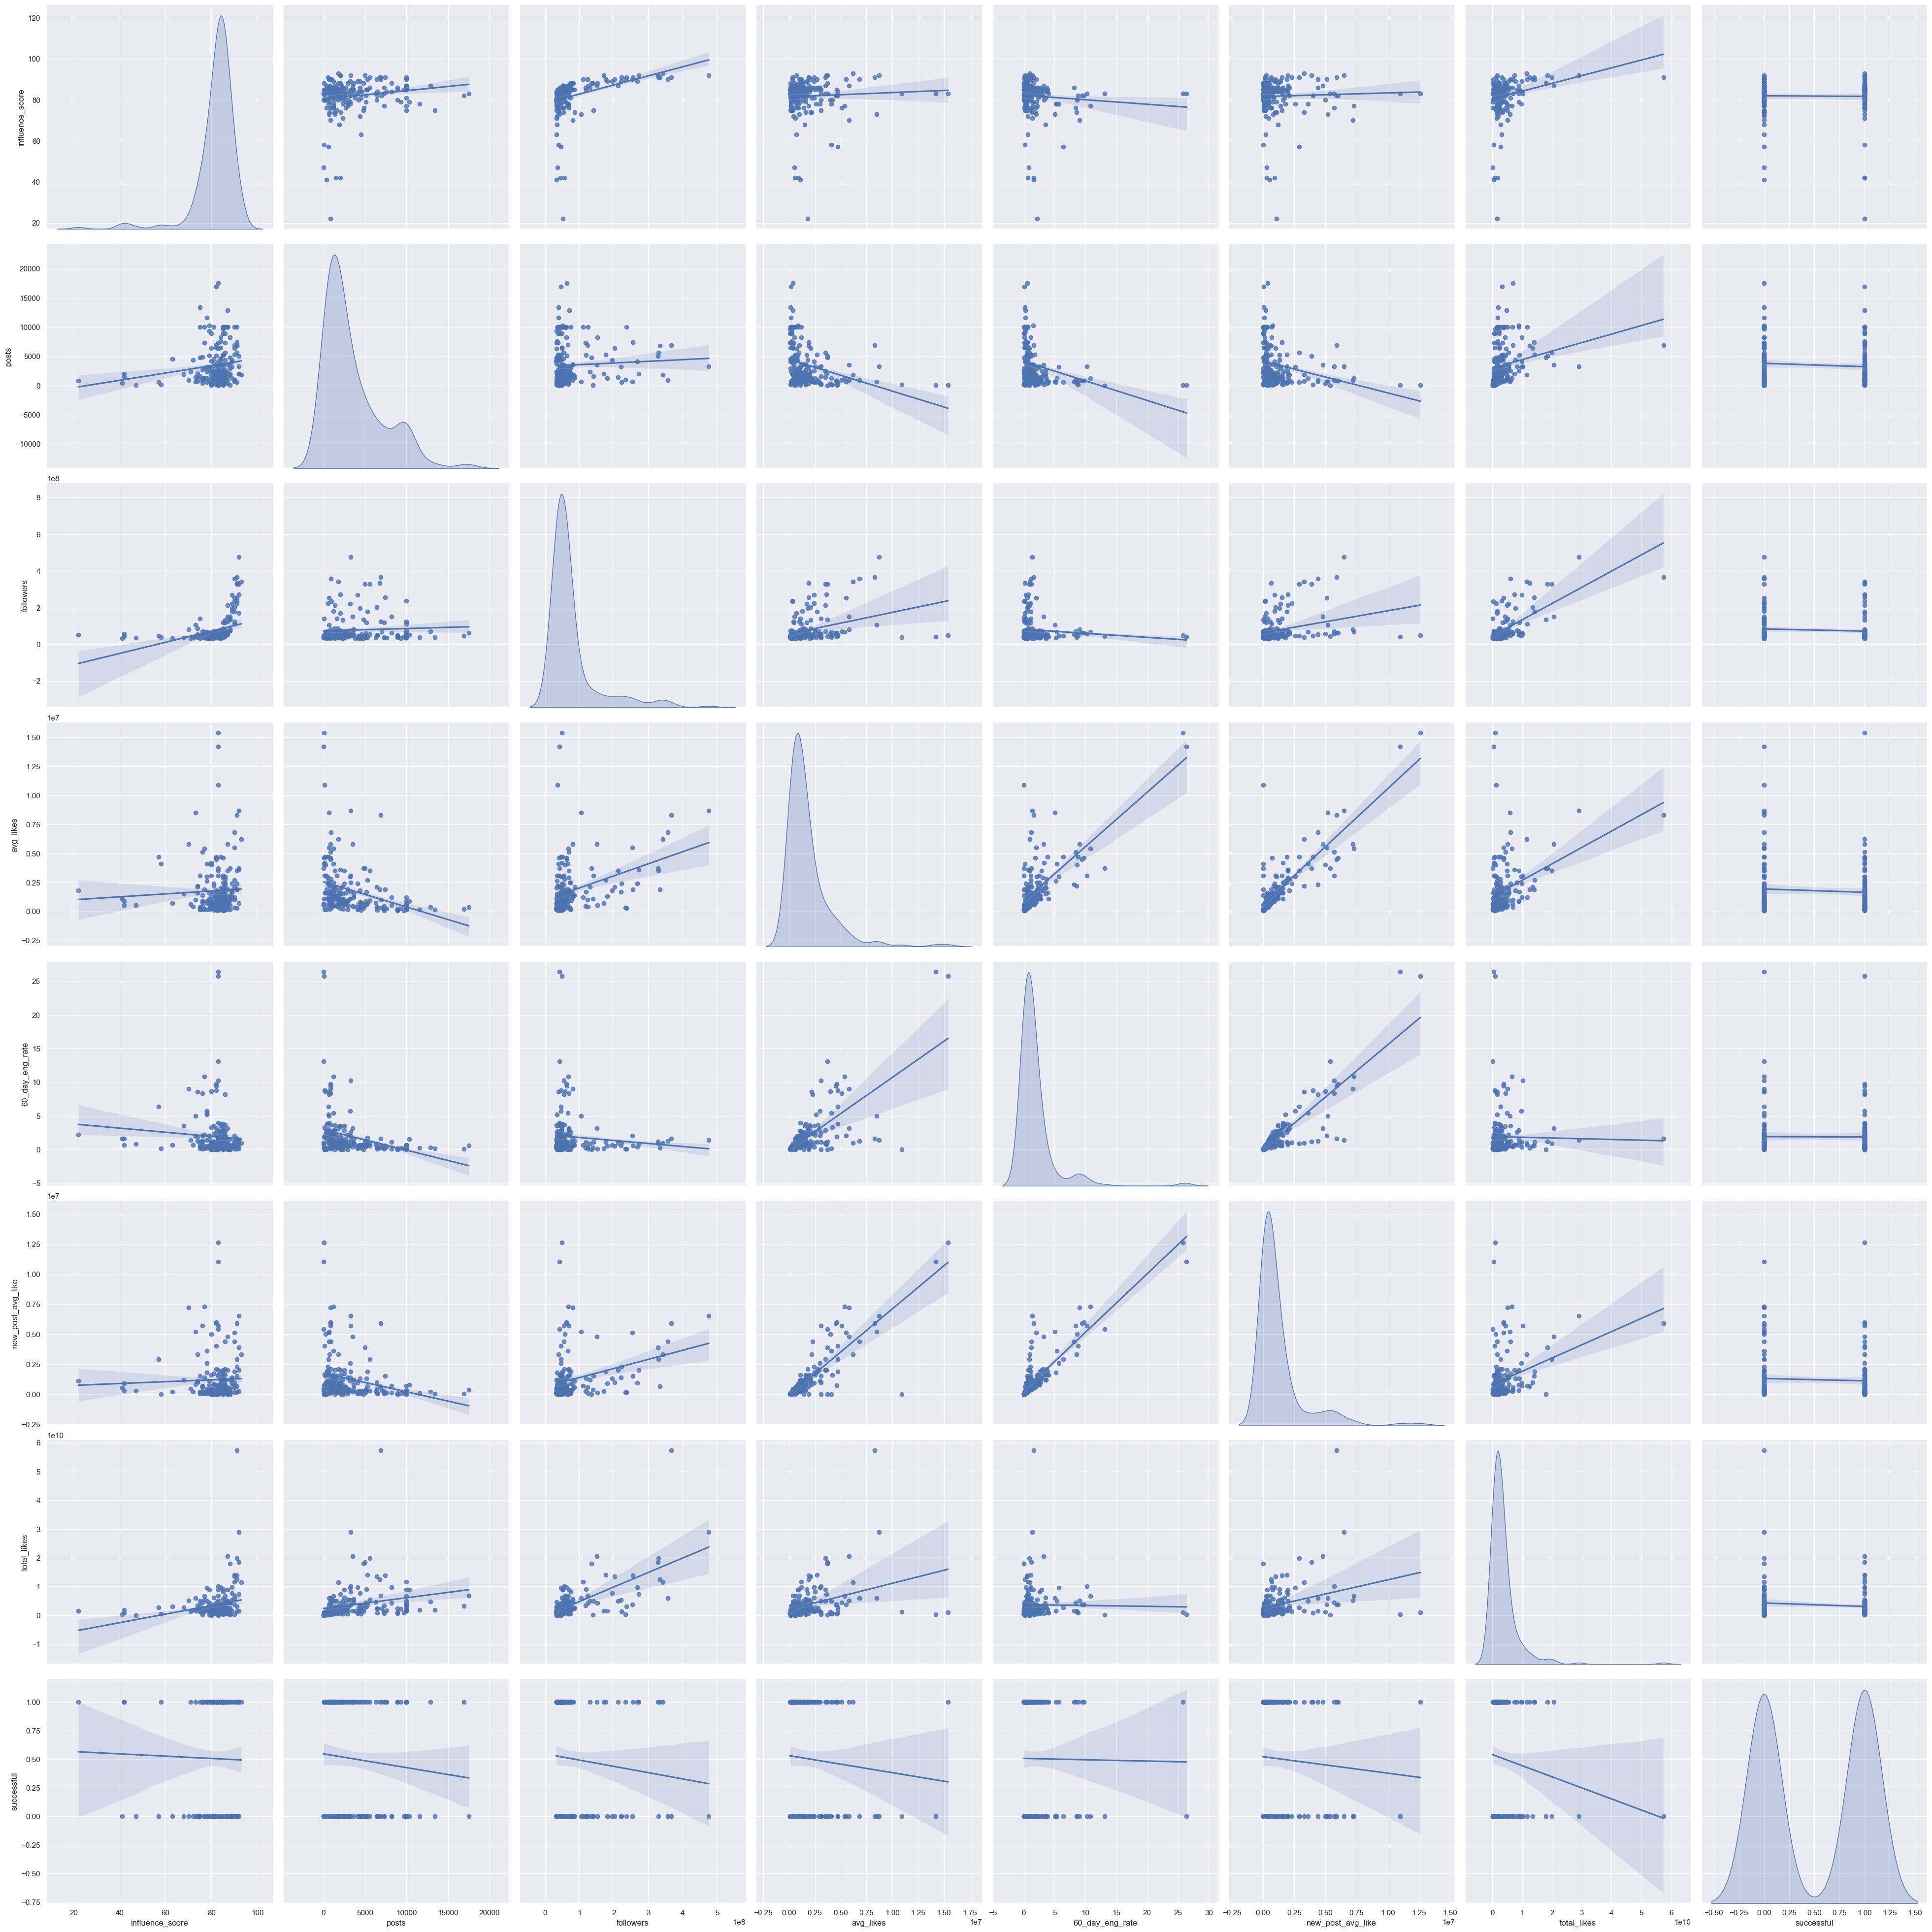

In [102]:
sns.set()
sns.pairplot(data[num_features],height=5,kind='reg',diag_kind='kde')
plt.show()

# Train ML Algorithm

### The code I provided is using the Python library scikit-learn to split the dataset into training and testing sets using the train_test_split function.

In [75]:
from sklearn.model_selection import train_test_split

# Load the dataset

# Separate the features and target variable
X = data.drop('successful', axis=1)  # Features
y = data['successful']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### In this code, the decision tree model (dt_model) is trained using the training data (X_train and y_train). Then, the model is used to make predictions on the testing data (X_test), and the accuracy is calculated using the accuracy_score function from sklearn.metrics. Finally, the mean squared error is calculated using the mean_squared_error function, comparing the predictions (dt_predictions) with the actual target values (y_test). The mean squared error result is stored in the variable dt_mse.

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import numpy as np

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)



dt_mse = mean_squared_error(y_test, nn_predictions)


In [95]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_mse = mean_squared_error(y_test, knn_predictions)


In [96]:
# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_mse = mean_squared_error(y_test, svm_predictions)

In [97]:


# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)

nb_mse = mean_squared_error(y_test, nb_predictions)

In [98]:



# Backpropagation (Neural Network)
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)
nn_predictions = nn_model.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predictions)

nn_mse = mean_squared_error(y_test, nn_predictions)

In [99]:
print("KNN Accuracy:", int(knn_accuracy*100))
print("SVM Accuracy:", int(svm_accuracy*100))
print("Decision Tree Accuracy:", int(dt_accuracy*100))
print("Backpropagation (Neural Network) Accuracy:", int(nn_accuracy*100))
print("Naive Bayes Accuracy:", int(nb_accuracy*100))

KNN Accuracy: 62
SVM Accuracy: 55
Decision Tree Accuracy: 52
Backpropagation (Neural Network) Accuracy: 50
Naive Bayes Accuracy: 47


In [101]:
print("KNN MSE:", knn_mse)
print("SVM MSE:", svm_mse)

print("Decision Tree MSE:", dt_mse)
print("Backpropagation (Neural Network) MSE:", nn_mse)

print("Naive Bayes MSE:", nb_mse)

KNN MSE: 0.375
SVM MSE: 0.45
Decision Tree MSE: 0.5
Backpropagation (Neural Network) MSE: 0.5
Naive Bayes MSE: 0.525


### The obtained results show relatively low accuracy scores for the different machine learning models applied to the dataset. The low accuracy could be attributed to several factors. Firstly, the dataset might be insufficient or incomplete, lacking necessary information for the models to learn meaningful patterns. Additionally, the high dimensionality of the dataset could have contributed to the lower accuracy, making it challenging for the models to find meaningful relationships among the features. I didn't have enough data. and also I couldnt even make more data to be normal and suitable for data's features. So if we have enough data we can train more valuable model.